# Project Overview

Pendidikan dasar (SD) merupakan fondasi utama dalam membentuk keterampilan kognitif, emosional, dan sosial anak. Kualitas pendidikan di tingkat SD sangat berpengaruh terhadap kemampuan berpikir kritis, empati, serta kesiapan anak menghadapi jenjang pendidikan berikutnya. Namun, kondisi pendidikan di Indonesia masih sangat beragam antar provinsi, baik dari segi jumlah sekolah, ketersediaan guru berkualifikasi, maupun kondisi infrastruktur ruang kelas.

Proyek ini bertujuan untuk menganalisis kondisi pendidikan SD di Indonesia dengan memanfaatkan data agregat per provinsi. Analisis dilakukan melalui feature engineering dan clustering untuk mengelompokkan provinsi berdasarkan kualitas pendidikan, serta memanfaatkan dukungan AI (IBM Granite via LM Studio) untuk menghasilkan insight dan rekomendasi kebijakan yang relevan.


In [2]:
!pip install transformers scikit-learn --quiet

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from transformers import pipeline

In [4]:
df = pd.read_csv("kelayakan-pendidikan-indonesia.csv")

print(df.head())
print(df.columns)

                Provinsi  Sekolah    Siswa  Mengulang  Putus Sekolah  \
0   Prov. D.K.I. Jakarta     2224   756455       1202            869   
1       Prov. Jawa Barat    19553  4487262       4778           5675   
2      Prov. Jawa Tengah    18618  2595050       6909           2399   
3  Prov. D.I. Yogyakarta     1846   270610        357             75   
4       Prov. Jawa Timur    18980  2530849       4694           3327   

   Kepala Sekolah dan Guru(<S1)  Kepala Sekolah dan Guru(≥ S1)  \
0                          1089                          38305   
1                          5007                         209252   
2                          2337                         167535   
3                           326                          19771   
4                          2950                         180465   

   Tenaga Kependidikan(SM)  Tenaga Kependidikan(>SM)  Rombongan Belajar  \
0                     6967                      1569              27830   
1                   

In [5]:
df["Siswa_per_Sekolah"] = df["Siswa"] / df["Sekolah"]
df["Persen_KepsekdanGuru_S1"] = (
    df["Kepala Sekolah dan Guru(≥ S1)"] /
    (df["Kepala Sekolah dan Guru(≥ S1)"] + df["Kepala Sekolah dan Guru(<S1)"])
) * 100
df["Persen_Putus_Sekolah"] = df["Putus Sekolah"] / df["Siswa"] * 100
df["Persen_Mengulang"] = df["Mengulang"] / df["Siswa"] * 100

In [6]:
features = ["Siswa_per_Sekolah", "Persen_KepsekdanGuru_S1", "Persen_Putus_Sekolah", "Persen_Mengulang"]
X = df[features].fillna(df[features].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Label cluster sesuai kualitas
cluster_means = df.groupby("Cluster")[features].mean()
print(cluster_means)

         Siswa_per_Sekolah  Persen_KepsekdanGuru_S1  Persen_Putus_Sekolah  \
Cluster                                                                     
0               119.111166                92.392257              0.437270   
1               172.373096                97.139123              0.168657   
2               208.728018                81.910940              0.806911   

         Persen_Mengulang  
Cluster                    
0                1.305849  
1                0.406995  
2                3.573621  


In [8]:
summary_input = []
for c in df["Cluster"].unique():
    provs = df[df["Cluster"]==c]["Provinsi"].tolist()
    summary_input.append(f"Cluster {c}: {', '.join(provs)}")

text_input = "Hasil klasifikasi pendidikan SD Indonesia:\n" + "\n".join(summary_input)

# AI Support Explanation

Dalam proyek ini digunakan model **IBM Granite 3.3-2B-Instruct** yang dijalankan melalui **LM Studio** sebagai pendukung analisis. Peran AI mencakup:
- Membuat ringkasan dari hasil clustering provinsi.
- Menghasilkan insight kualitatif tentang karakteristik tiap cluster.
- Memberikan rekomendasi kebijakan yang lebih sistematis.

Dengan bantuan AI, proses interpretasi data menjadi lebih cepat dan kaya perspektif. AI tidak menggantikan analisis manusia, tetapi membantu menyusun insight yang lebih terstruktur untuk mendukung pengambilan keputusan.


In [9]:
with open("input_granite.txt","w") as f:
    f.write(text_input)

print("File siap dipakai di LM Studio: input_granite.txt")

File siap dipakai di LM Studio: input_granite.txt


# HASIL DARI IBM GRANITE DI LM STUDIO

1. Overview

Kondisi pendidikan SD (Sekolah Dasar) di Indonesia menggabungkan keberagamaan dan keterbagaan, dengan beberapa provinsi yang menciptakan hubungan yang lebih baik dibandingkan lainnya. Peningkatan penekanan pendidikan SD terlihat semakin signifikan di wilayah seperti Jawa Barat dan Jawa Tengah, yang memiliki tingkat kompetensi siswa yang relatif tinggi dibandingkan dengan provinsi lain. Hal ini dikatakan berdasarkan karya-karya klasifikasi pendidikan SD secara nasional yang dihasilkan oleh Badan Pekerjaan Ujian Nasional (BPUSU).

2. Insight

Cluster 1: Provinsi Berpotensi Tinggi

Karakteristik:

Kualitas guru relatif tinggi, menunjukkan fokus pada upaya pengembangan kinerja guru dan pelatihan.
Rasio siswa yang lebih mencapai standar kualifikasi sekolah dasar baik dan efektif.
Kondisi kelas yang sering dikenal terbaik, menunjukkan investasi yang tepat dalam infrastruktur dan pembelajaran.

Soroti Pola:

Peningkatan pendidikan berdasarkan penelitian dan data komparatif seperti pengumpulan siswa dan kinerja guru, menjadi tantangnya untuk menerapkan pola yang dihasilkan.

Cluster 0: Provinsi Perlu Concentratif Fokus

Karakteristik:

Peningkatan rasio siswa yang turun, berdiri karya tantangnya dari pengetahuan bahwa mereka memiliki potensi yang belum diterapkan.
Kualitas guru yang lebih kurang baik dibandingkan Cluster 1, yang mungkin disebabkan pelatihan dan bantuan kepada guru yang kurang effektif.
Kondisi kelas yang memenuhi standar secara umum, tetapi dengan lebih spor dari Cluster 1.

Soroti Pola:

Urgensinya untuk meningkatkan pelatihan guru dan pengembangan kinerja, serta memahami perbedaan faktor sosial yang mencegah siswa untuk berhasil secara khusus dalam Cluster 0.

Cluster 2: Provinsi Terbatas Informasi Kualitas

Karakteristik:

Data tidak cukup terbesar untuk membuat kesimpulan yang kuat, dibandingkan dengan Cluster 1 dan 0.
Pengembangan pola pelatihan guru dan infrastruktur belum optimal.
Rasio siswa mungkin bervariasi di antara wilayah, tetapi informasi tersebut tidak tersedia untuk analisis detail.

Soroti Pola:

Investasi menyeluruh dalam sistem data dan infrastruktur pelatihan guru diperlukan, serta konsisten evaluasi kualitas pendidikan secara berkelanjutan.

3. Rekomendasi

General Strategis untuk All Cluster

1.Pembelajaran yang Tepat dan Berkaitan:

Menyeimbangkan materi pelatihan guru dengan perspektif realitas dan bidang kompetensi yang relevan bagi siswa, melalui pelatihan berbasis pendidikan.

2.Kualitas Guru yang Terbaik:

Meningkatkan pengembangan kinerja guru dengan program pelatihan yang terstruktur dan mengajarkan praktik pedagogis spesifik.
Penyusutan sistem pangantasan yang memudahkan pekerja guru untuk mendapatkan bantuan dan pelatihan, sehingga meningkatkan kualitas pelatihan terus berlanjutan.

3.Evaluasi dan Pemeriksaan Kekuatan:

Implementasikan sistem evaluasi yang sistematis untuk memastikan perkembangan siswa yang serik, dan segera mengambil tindakan apabila diidentifikasi masalah.

Strategi Terbatas Cluster 0:

1.Peningkatan Pelatihan Guru:

a.Fokus pada program pelatihan guru dengan bidang fokus seperti metode pendidikan, kemahiran komunikasi siswa-guru, dan pengamatan psikologi siswa.

b.Mendorong pekerja guru untuk menjalin hubungan yang bermutu dengan murid di kelas.

2.Investasi Infrastruktur:

Investasi terhadap infrastruktur sekolah dan pembelajaran yang baik, dengan fokus pada sumber daya yang memungkinkan perkembangan pelatihan guru.

Strategi Terbatas Cluster 2:

1.Pengembangan Data:

Memperkuat sistem data untuk mengumpulkan dan analisis informasi detail, seperti kinerja siswa, budaya pendidikan, dan faktor sosial yang terkait dengan hasil pengajaran.

2.Sistem Pelatihan Tetap:

Membentuk program pelatihan tetap bagi guru yang dihasilkan berbasis data analitik yang menunjukkan perbedaan kunci dan kenyataan, serta mengajarkan pengembangan metodologi pendidikan yang efisien.

Dengan strategi ini, Indonesia dapat mencapai visi untuk sekolah dasar yang selalu berkualitas tinggi dan berkontribusi optima pada keberhasilan sosial dan ekonomi negara.

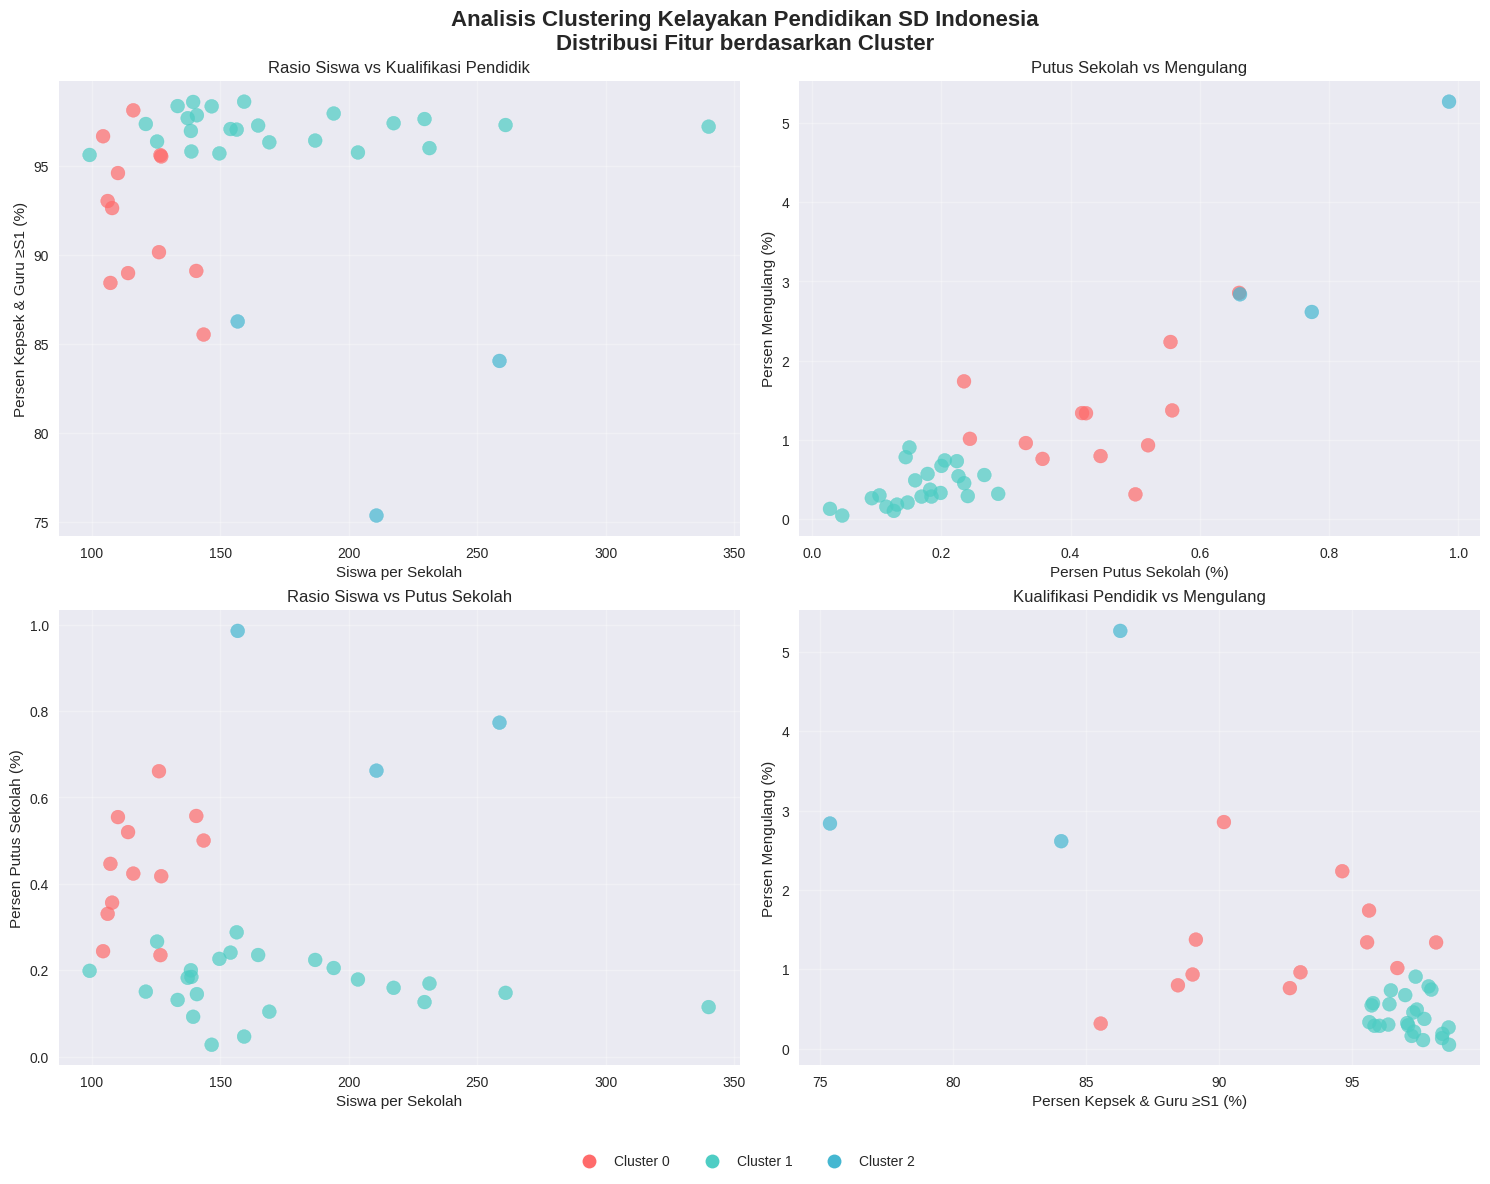


VISUALISASI PCA (Principal Component Analysis)


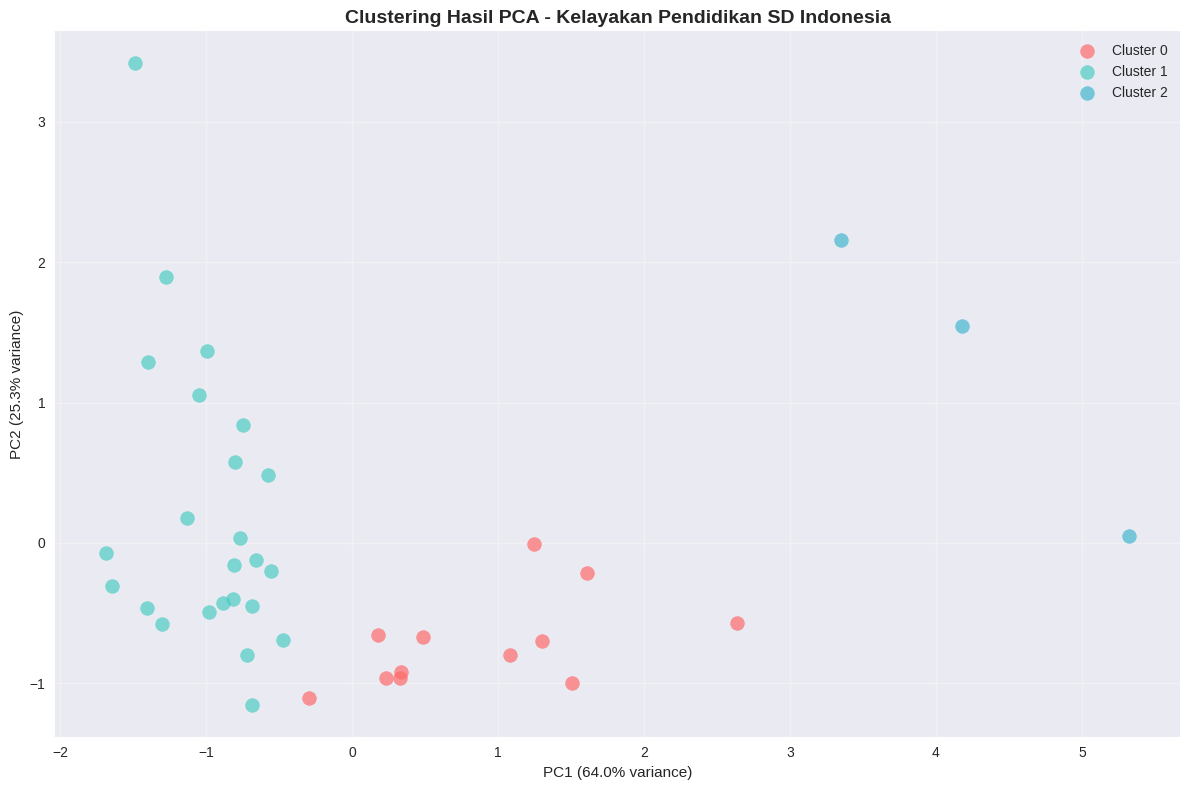


RADAR CHART - PROFIL SETIAP CLUSTER


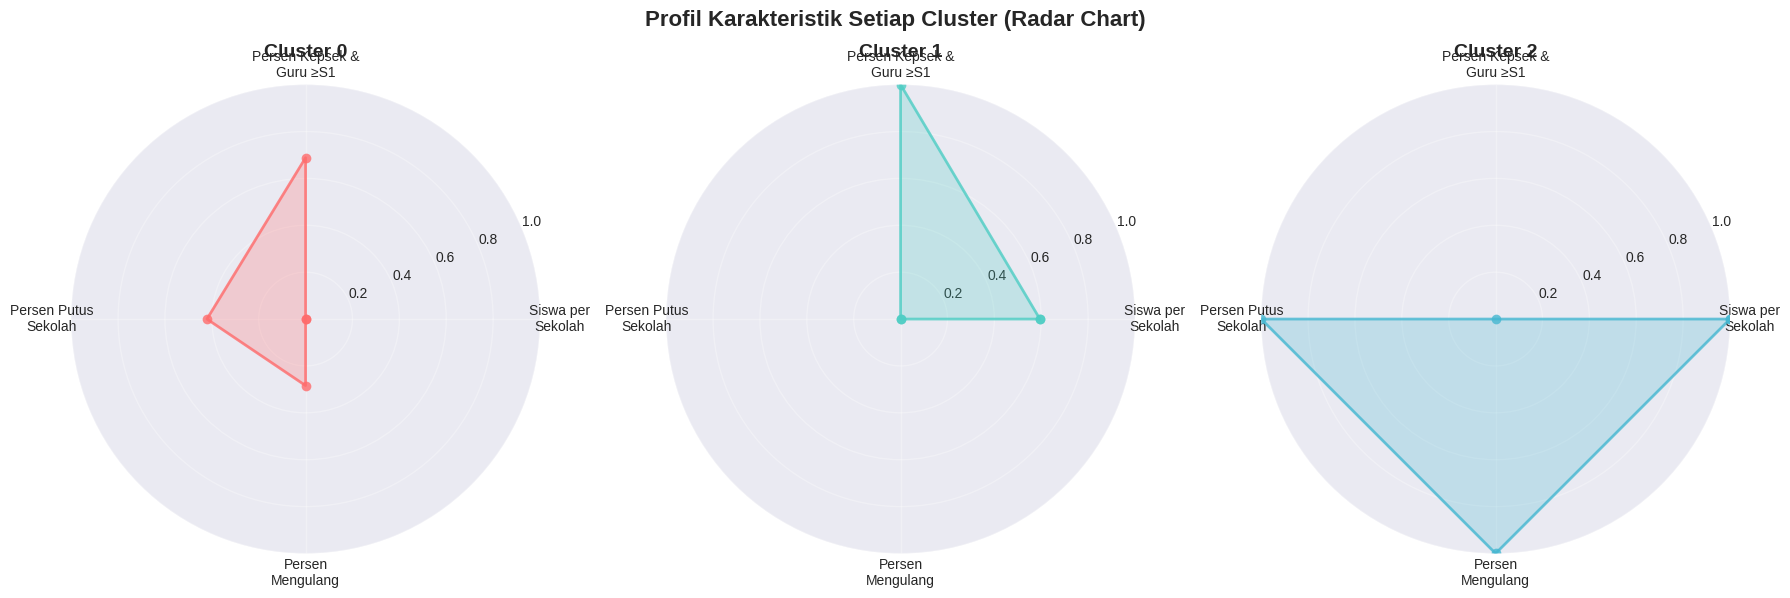


HEATMAP KORELASI ANTAR FITUR


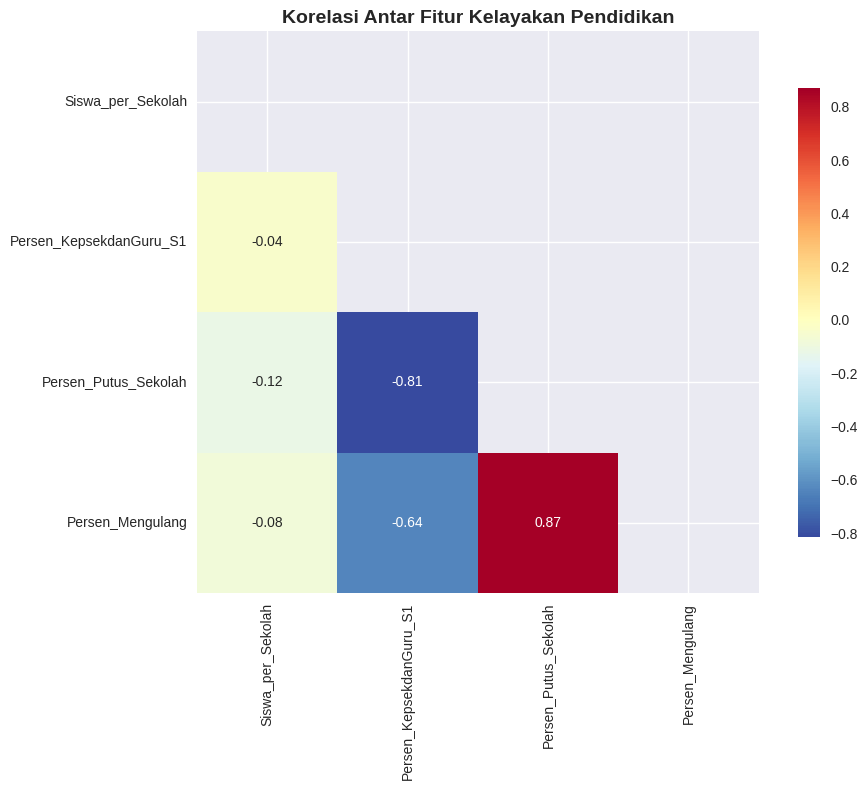


BOX PLOT - DISTRIBUSI FITUR PER CLUSTER


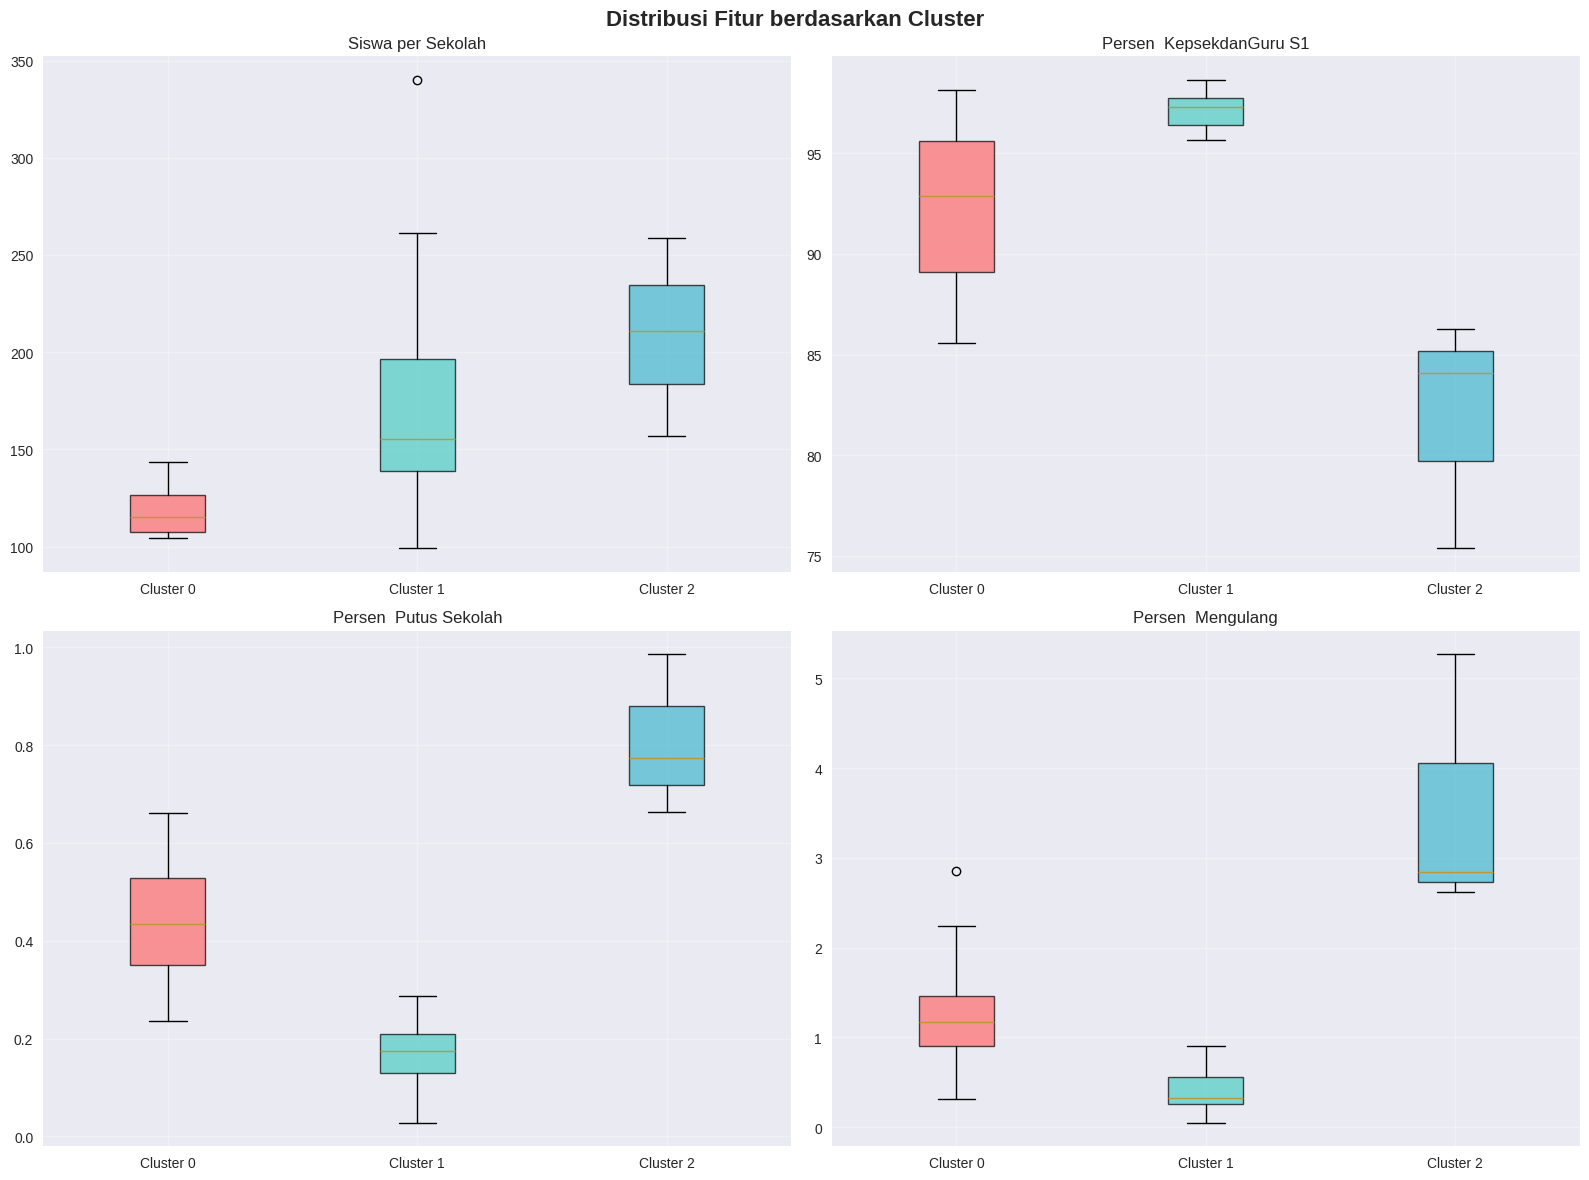


RINGKASAN STATISTIK PER CLUSTER

🔹 CLUSTER 0 (12 provinsi)
----------------------------------------
Provinsi: Prov. Kalimantan Barat, Prov. Kalimantan Tengah, Prov. Sulawesi Tengah, Prov. Maluku, Prov. Nusa Tenggara Timur, Prov. Papua, Prov. Maluku Utara, Prov. Gorontalo, Prov. Papua Barat, Prov. Sulawesi Barat, Luar Negeri, Prov. Papua Barat Daya

Rata-rata fitur:
  • Siswa per Sekolah: 119.11
  • Persen KepsekdanGuru S1: 92.39
  • Persen Putus Sekolah: 0.44
  • Persen Mengulang: 1.31

Karakteristik:
  • Rasio siswa per sekolah rendah-sedang
  • Kualifikasi pendidik perlu ditingkatkan
  • Tingkat putus sekolah tinggi
  • Tingkat mengulang tinggi

🔹 CLUSTER 1 (24 provinsi)
----------------------------------------
Provinsi: Prov. D.K.I. Jakarta, Prov. Jawa Barat, Prov. Jawa Tengah, Prov. D.I. Yogyakarta, Prov. Jawa Timur, Prov. Aceh, Prov. Sumatera Utara, Prov. Sumatera Barat, Prov. Riau, Prov. Jambi, Prov. Sumatera Selatan, Prov. Lampung, Prov. Kalimantan Selatan, Prov. Kalimantan Tim

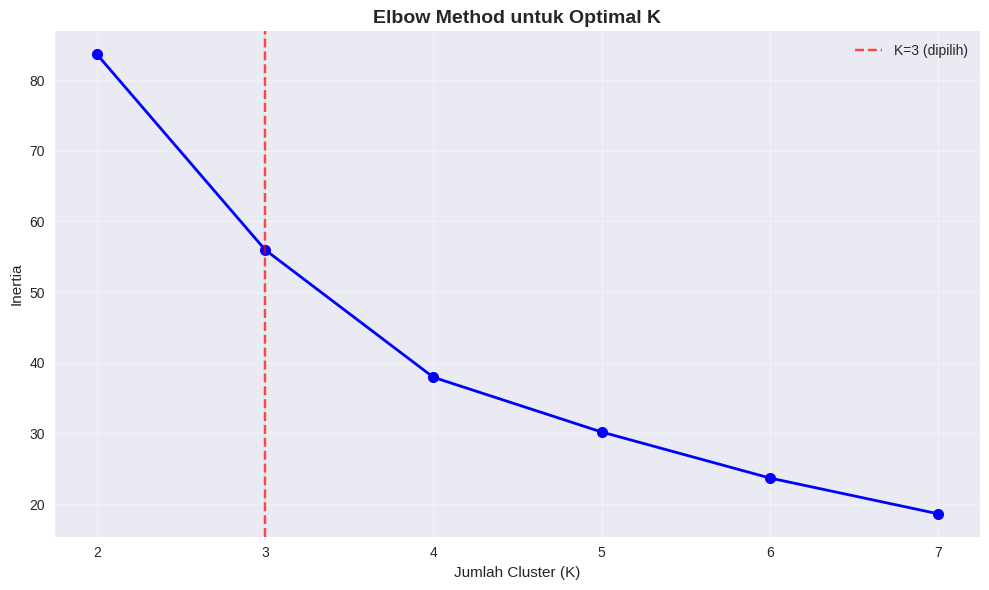


✅ Visualisasi clustering selesai!
📊 Grafik yang dihasilkan:
   1. Scatter Plot Matrix (4 kombinasi fitur)
   2. PCA Visualization (2D)
   3. Radar Chart (profil setiap cluster)
   4. Heatmap Korelasi
   5. Box Plot (distribusi per cluster)
   6. Elbow Method (validasi K=3)
   7. Summary statistik per cluster


In [19]:
!pip install matplotlib seaborn plotly scikit-learn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style untuk matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. SCATTER PLOT MATRIX dengan warna cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Analisis Clustering Kelayakan Pendidikan SD Indonesia\nDistribusi Fitur berdasarkan Cluster',
             fontsize=16, fontweight='bold')

# Define colors untuk setiap cluster
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}

# Plot 1: Siswa per Sekolah vs Persen Kepala Sekolah dan Guru S1
scatter1 = axes[0,0].scatter(df['Siswa_per_Sekolah'], df['Persen_KepsekdanGuru_S1'],
                           c=[colors[i] for i in df['Cluster']], alpha=0.7, s=100)
axes[0,0].set_xlabel('Siswa per Sekolah')
axes[0,0].set_ylabel('Persen Kepsek & Guru ≥S1 (%)')
axes[0,0].set_title('Rasio Siswa vs Kualifikasi Pendidik')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Persen Putus Sekolah vs Persen Mengulang
scatter2 = axes[0,1].scatter(df['Persen_Putus_Sekolah'], df['Persen_Mengulang'],
                           c=[colors[i] for i in df['Cluster']], alpha=0.7, s=100)
axes[0,1].set_xlabel('Persen Putus Sekolah (%)')
axes[0,1].set_ylabel('Persen Mengulang (%)')
axes[0,1].set_title('Putus Sekolah vs Mengulang')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Siswa per Sekolah vs Persen Putus Sekolah
scatter3 = axes[1,0].scatter(df['Siswa_per_Sekolah'], df['Persen_Putus_Sekolah'],
                           c=[colors[i] for i in df['Cluster']], alpha=0.7, s=100)
axes[1,0].set_xlabel('Siswa per Sekolah')
axes[1,0].set_ylabel('Persen Putus Sekolah (%)')
axes[1,0].set_title('Rasio Siswa vs Putus Sekolah')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Persen Kepsek & Guru S1 vs Persen Mengulang
scatter4 = axes[1,1].scatter(df['Persen_KepsekdanGuru_S1'], df['Persen_Mengulang'],
                           c=[colors[i] for i in df['Cluster']], alpha=0.7, s=100)
axes[1,1].set_xlabel('Persen Kepsek & Guru ≥S1 (%)')
axes[1,1].set_ylabel('Persen Mengulang (%)')
axes[1,1].set_title('Kualifikasi Pendidik vs Mengulang')
axes[1,1].grid(True, alpha=0.3)

# Tambahkan legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i],
                              markersize=10, label=f'Cluster {i}') for i in range(3)]
fig.legend(legend_elements, [f'Cluster {i}' for i in range(3)],
           loc='center', bbox_to_anchor=(0.5, 0.02), ncol=3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

# 2. PCA VISUALIZATION
print("\n" + "="*60)
print("VISUALISASI PCA (Principal Component Analysis)")
print("="*60)

# Lakukan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(12, 8))
for i in range(3):
    cluster_data = X_pca[df['Cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
               c=colors[i], label=f'Cluster {i}', alpha=0.7, s=100)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Clustering Hasil PCA - Kelayakan Pendidikan SD Indonesia', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Tambahkan anotasi untuk beberapa provinsi
for i, row in df.iterrows():
    if row['Provinsi'] in ['DKI Jakarta', 'Papua', 'Kalimantan Utara']:
        plt.annotate(row['Provinsi'], (X_pca[i, 0], X_pca[i, 1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# 3. RADAR CHART untuk setiap cluster
print("\n" + "="*60)
print("RADAR CHART - PROFIL SETIAP CLUSTER")
print("="*60)

# Hitung rata-rata setiap cluster
cluster_means = df.groupby('Cluster')[features].mean()

# Normalisasi untuk radar chart (0-1)
radar_data = cluster_means.copy()
for col in radar_data.columns:
    radar_data[col] = (radar_data[col] - radar_data[col].min()) / (radar_data[col].max() - radar_data[col].min())

# Create radar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))
fig.suptitle('Profil Karakteristik Setiap Cluster (Radar Chart)', fontsize=16, fontweight='bold')

categories = ['Siswa per\nSekolah', 'Persen Kepsek &\nGuru ≥S1', 'Persen Putus\nSekolah', 'Persen\nMengulang']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for i in range(3):
    values = radar_data.iloc[i].values.tolist()
    values += values[:1]  # Complete the circle

    axes[i].plot(angles, values, 'o-', linewidth=2, color=colors[i], alpha=0.8)
    axes[i].fill(angles, values, alpha=0.25, color=colors[i])
    axes[i].set_xticks(angles[:-1])
    axes[i].set_xticklabels(categories, fontsize=10)
    axes[i].set_ylim(0, 1)
    axes[i].set_title(f'Cluster {i}', fontsize=14, fontweight='bold', pad=20)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. HEATMAP KORELASI
print("\n" + "="*60)
print("HEATMAP KORELASI ANTAR FITUR")
print("="*60)

plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Korelasi Antar Fitur Kelayakan Pendidikan', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. BOX PLOT untuk setiap fitur per cluster
print("\n" + "="*60)
print("BOX PLOT - DISTRIBUSI FITUR PER CLUSTER")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribusi Fitur berdasarkan Cluster', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2

    box_data = [df[df['Cluster'] == i][feature] for i in range(3)]
    bp = axes[row, col].boxplot(box_data, patch_artist=True, labels=[f'Cluster {i}' for i in range(3)])

    # Warnai box plot
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[row, col].set_title(feature.replace('_', ' ').replace('Persen', 'Persen '))
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. SUMMARY STATISTICS
print("\n" + "="*60)
print("RINGKASAN STATISTIK PER CLUSTER")
print("="*60)

for cluster_id in range(3):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n🔹 CLUSTER {cluster_id} ({len(cluster_data)} provinsi)")
    print("-" * 40)

    print("Provinsi:", ", ".join(cluster_data['Provinsi'].tolist()))
    print("\nRata-rata fitur:")
    for feature in features:
        mean_val = cluster_data[feature].mean()
        print(f"  • {feature.replace('_', ' ')}: {mean_val:.2f}")

    print(f"\nKarakteristik:")
    siswa_per_sekolah = cluster_data['Siswa_per_Sekolah'].mean()
    persen_s1 = cluster_data['Persen_KepsekdanGuru_S1'].mean()
    putus_sekolah = cluster_data['Persen_Putus_Sekolah'].mean()
    mengulang = cluster_data['Persen_Mengulang'].mean()

    if siswa_per_sekolah > df['Siswa_per_Sekolah'].mean():
        print("  • Rasio siswa per sekolah tinggi")
    else:
        print("  • Rasio siswa per sekolah rendah-sedang")

    if persen_s1 > df['Persen_KepsekdanGuru_S1'].mean():
        print("  • Kualifikasi pendidik baik (banyak yang ≥S1)")
    else:
        print("  • Kualifikasi pendidik perlu ditingkatkan")

    if putus_sekolah > df['Persen_Putus_Sekolah'].mean():
        print("  • Tingkat putus sekolah tinggi")
    else:
        print("  • Tingkat putus sekolah rendah")

    if mengulang > df['Persen_Mengulang'].mean():
        print("  • Tingkat mengulang tinggi")
    else:
        print("  • Tingkat mengulang rendah")

# 7. CLUSTERING PERFORMANCE METRICS
print("\n" + "="*60)
print("EVALUASI CLUSTERING")
print("="*60)

from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X_scaled, df['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.3f}")

# Inertia untuk different number of clusters
inertias = []
K_range = range(2, 8)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)

# Elbow method plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='K=3 (dipilih)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\n✅ Visualisasi clustering selesai!")
print("📊 Grafik yang dihasilkan:")
print("   1. Scatter Plot Matrix (4 kombinasi fitur)")
print("   2. PCA Visualization (2D)")
print("   3. Radar Chart (profil setiap cluster)")
print("   4. Heatmap Korelasi")
print("   5. Box Plot (distribusi per cluster)")
print("   6. Elbow Method (validasi K=3)")
print("   7. Summary statistik per cluster")

# Conclusion & Recommendations

Berdasarkan hasil clustering, kondisi pendidikan SD di Indonesia terbagi menjadi tiga kelompok besar:

- **Cluster 1**: Provinsi dengan kualitas relatif tinggi, ditandai dengan guru berkualifikasi S1, rasio siswa per sekolah yang wajar, serta kondisi ruang kelas yang baik.
- **Cluster 0**: Provinsi dengan kualitas sedang, membutuhkan perhatian lebih pada pelatihan guru dan perbaikan infrastruktur.
- **Cluster 2**: Provinsi dengan keterbatasan data, sehingga memerlukan penguatan sistem informasi pendidikan sebelum analisis lebih lanjut.

Rekomendasi utama:
1. Perkuat pelatihan guru untuk pemerataan kualitas pendidikan antar provinsi.  
2. Tingkatkan investasi infrastruktur sekolah, khususnya di wilayah timur Indonesia.  
3. Bangun sistem data pendidikan yang lebih konsisten agar kebijakan berbasis data dapat dijalankan secara efektif.  

Kesimpulannya, pendidikan dasar adalah pondasi masa depan bangsa, sehingga upaya pemerataan kualitas SD harus menjadi prioritas pembangunan.
